# Comparaison entre les 2 signaux sur une même fenêtre d'observation

## Importation des librairies nécéssaires

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from datetime import datetime
from scipy import signal

# Preparation des données

## Importation

In [121]:
data_real = pd.read_csv('./sigma_Cband.csv', sep=",")
data_real_2 = pd.read_csv('./sigma_Lband.csv', sep=",")
data_real_3 = pd.read_csv('./sigma_Pband.csv', sep=",")

## Affichage

In [122]:
#  Série 1
data = data_real.to_numpy()
time_serie = pd.Series(data[:, 2], dtype='float64')
time_serie = time_serie.dropna()

#  Série 2
data2 = data_real_2.to_numpy()
time_serie2 = pd.Series(data2[:, 2], dtype='float64')
time_serie2 = time_serie2.dropna()

data3 = data_real_3.to_numpy()
time_serie3 = pd.Series(data3[:, 2], dtype='float64')
time_serie3 = time_serie3.dropna()

# Remettre les dates correctement

In [123]:
d = data[0,0] + " " + data[0,1]
print(d)
# Retirer les préfixes pour correspondre au format
d_cleaned = d.replace("Y", "").replace("M", "").replace("D", "").replace("H", "")
# Parser la chaîne nettoyée avec le bon format
parsed_date = datetime.strptime(d_cleaned, "%Y-%m-%d %H%M")
print(parsed_date)

Y2021-M08-D01 00H15
2021-08-01 00:15:00


In [124]:
def dates (data) :
    for i in range(len(data)) :
        d = data[i,0] + " " + data[i,1]
        d_cleaned = d.replace("Y", "").replace("M", "").replace("D", "").replace("H", "")
        parsed_date = datetime.strptime(d_cleaned, "%Y-%m-%d %H%M")
        data[i,0] = parsed_date
    data = data[:,[0,2]]
    return data

In [125]:
data = dates(data)
data2 = dates(data2)
data3 = dates(data3)

In [126]:
print(data)

[[datetime.datetime(2021, 8, 1, 0, 15) 51.97420130770133]
 [datetime.datetime(2021, 8, 1, 0, 30) 51.73640336244893]
 [datetime.datetime(2021, 8, 1, 0, 45) 52.26539536816637]
 ...
 [datetime.datetime(2021, 8, 31, 23, 30) 52.87303331851852]
 [datetime.datetime(2021, 8, 31, 23, 45) 52.728172020330376]
 [datetime.datetime(2021, 9, 1, 0, 0) 53.06370219866631]]


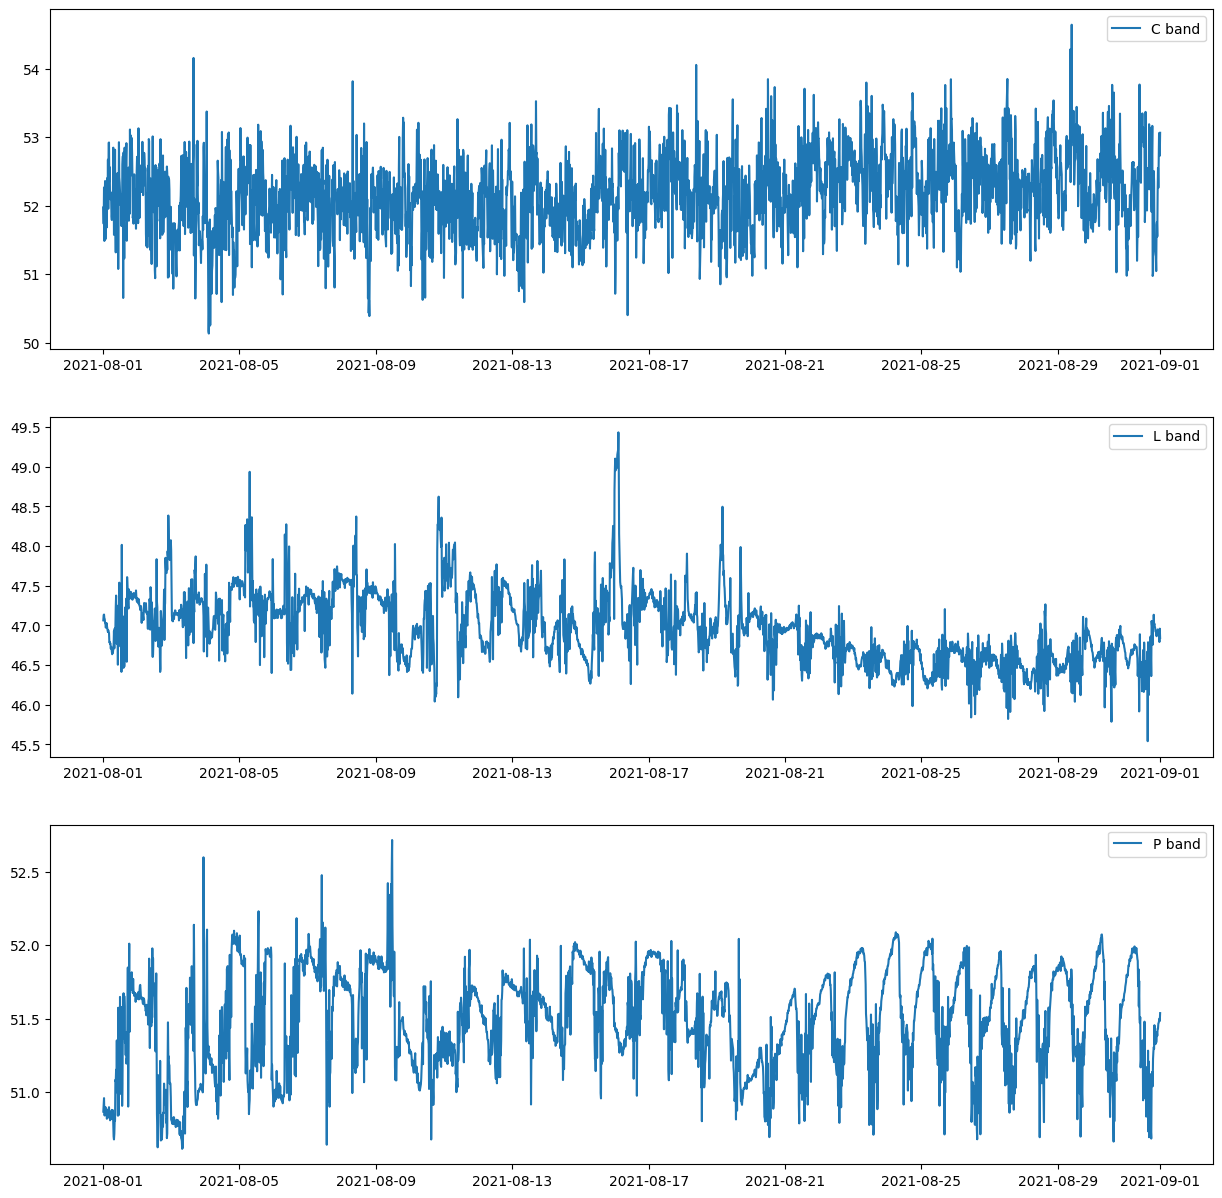

In [127]:
# Affichage des séries
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
datetime_data = data[:,0]
ax[0].plot(datetime_data,time_serie, label='C band')
ax[0].legend()
ax[1].plot(datetime_data,time_serie2, label='L band')
ax[1].legend()
ax[2].plot(datetime_data,time_serie3, label='P band')
ax[2].legend()
plt.show()

# Nettoyage des données

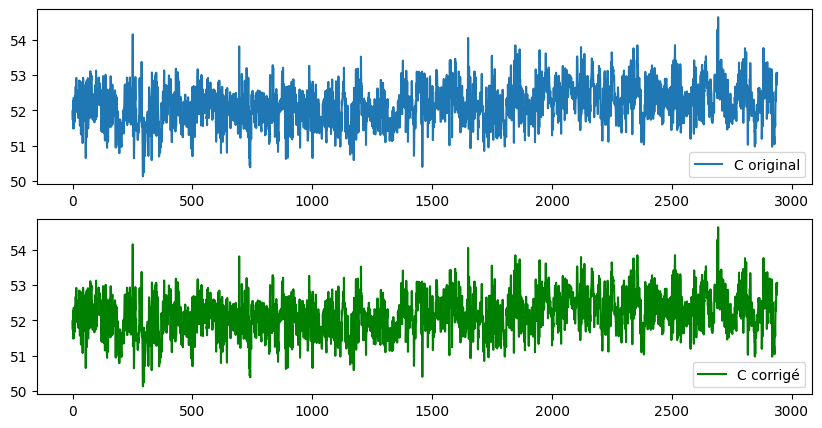

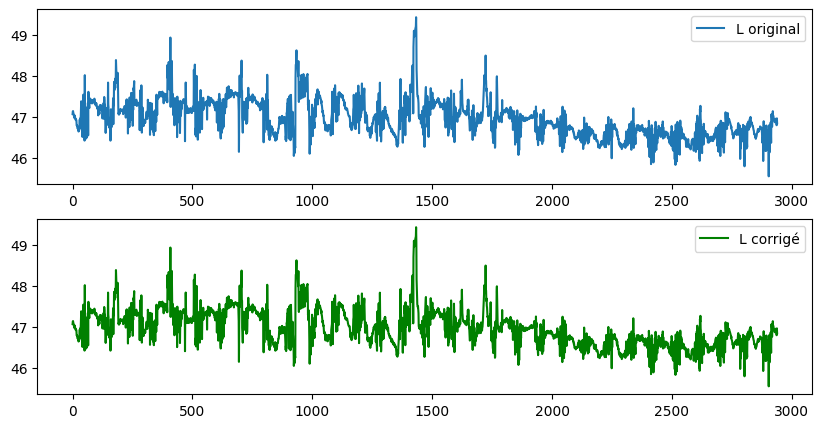

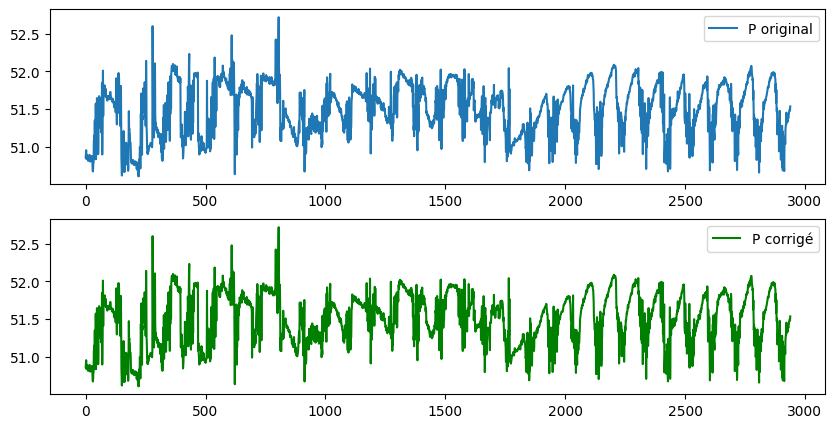

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie, label="C original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="C corrigé", color='green')
plt.legend()
plt.show()

#####

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie2)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie2.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie2, label="L original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="L corrigé", color='green')
plt.legend()
plt.show()

#####

# Seuil de détection de saut (valeur à ajuster selon ton signal)
seuil_offset = 50

# Détection des sauts
sauts = np.where(np.abs(np.diff(time_serie3)) > seuil_offset)[0]

# Correction du signal
data_ajust = time_serie3.copy()
for saut in sauts:
    # Ajuster les valeurs après le saut en supprimant l'offset
    offset = data_ajust[saut+1] - data_ajust[saut]
    data_ajust[saut+1:] -= offset

# Visualisation avant et après correction
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(time_serie3, label="P original")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(data_ajust, label="P corrigé", color='green')
plt.legend()
plt.show()

# Fréquence de 15

In [129]:
# Pas de temps de la série 1

def freq_15 (data) :
    data_time = data[:, 0]
    differences_minutes = [
        (data_time[i] - data_time[i-1]).total_seconds() / 60
        for i in range(1, len(data_time))
    ]

    print("Difference between two measurements for the time serie : ")
    print(np.unique(differences_minutes))

    start_time = data_time[0]
    end_time = data_time[-1]
    regular_time = pd.date_range(start=start_time, end=end_time, freq="15min")

    # Créer un DataFrame pour les données existantes
    df = pd.DataFrame({'time': data_time, 'value': data[:,1]})

    # Réindexer sur la série temporelle régulière
    df_regular = pd.DataFrame({'time': regular_time}).merge(df, on='time', how='left')

    # Interpoler les valeurs manquantes
    df_regular['value'] = df_regular['value'].interpolate(method='linear')

    # Résultat
    df_regular = df_regular.to_numpy()
    data_time = df_regular[:, 0]
    differences_minutes = [
        (data_time[i] - data_time[i-1]).total_seconds() / 60
        for i in range(1, len(data_time))
    ]

    print("Difference between two measurements for the time serie : ")
    print(np.unique(differences_minutes))

freq_15 (data)
freq_15 (data2)
freq_15 (data3)

Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]
Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]
Difference between two measurements for the time serie : 
[15. 30. 45.]
Difference between two measurements for the time serie : 
[15.]


C:\Users\pduch\AppData\Local\Temp\ipykernel_29220\936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')
C:\Users\pduch\AppData\Local\Temp\ipykernel_29220\936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')
C:\Users\pduch\AppData\Local\Temp\ipykernel_29220\936392555.py:24: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_regular['value'] = df_regular['value'].interpolate(method='linear')


In [130]:
print("Dates de début")
print(data[444,0])
print(data2[444,0])
print(data3[444,0])

print("Dates de fin")
print(data[-2,0])
print(data2[-1,0])
print(data3[-1,0])

time_serie_1 = data[444:-2,1]
time_serie_2 = data2[444:-1,1]
time_serie_3 = data3[444:-1,1]

Dates de début
2021-08-05 16:30:00
2021-08-05 16:30:00
2021-08-05 16:30:00
Dates de fin
2021-08-31 23:45:00
2021-08-31 23:45:00
2021-08-31 23:45:00


# Autocorrélation des signaux

Dans un premier temps on va regarder l'autocorrélation des signaux avec eux mêmes.

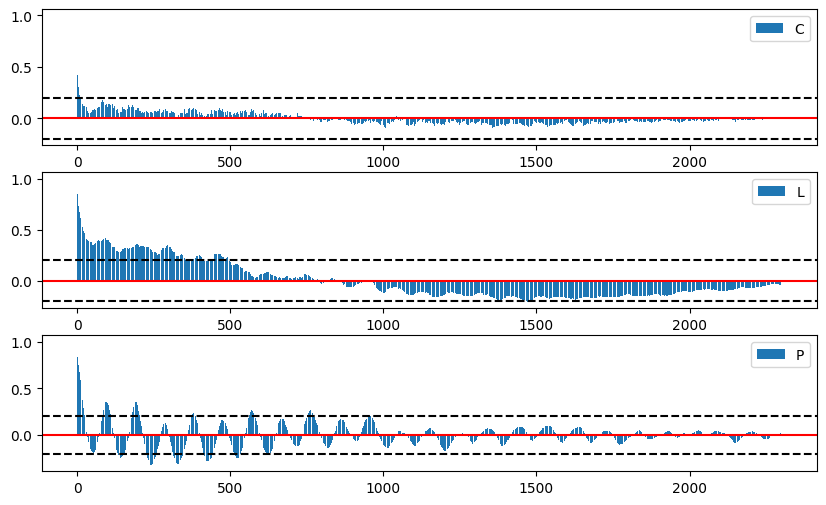

In [131]:
max_lag = 2300
acf_values_1 = sm.tsa.acf(time_serie_1, nlags = max_lag)
acf_values_2 = sm.tsa.acf(time_serie_2, nlags = max_lag)
acf_values_3 = sm.tsa.acf(time_serie_3, nlags = max_lag)

# Affichage de l'autocorrélation
fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].bar(range(max_lag + 1), acf_values_1, label='C')
ax[0].axhline(y=0.2, color='black', linestyle='--')
ax[0].axhline(y=0, color='red')
ax[0].axhline(y=-0.2, color='black', linestyle='--')
ax[0].legend()
ax[1].bar(range(max_lag + 1), acf_values_2, label='L')
ax[1].axhline(y=0.2, color='black', linestyle='--')
ax[1].axhline(y=0, color='red')
ax[1].axhline(y=-0.2, color='black', linestyle='--')
ax[1].legend()
ax[2].bar(range(max_lag + 1), acf_values_3, label='P')
ax[2].axhline(y=0.2, color='black', linestyle='--')
ax[2].axhline(y=0, color='red')
ax[2].axhline(y=-0.2, color='black', linestyle='--')
ax[2].legend()
plt.show()

# Cross correlations des signaux

## Radars

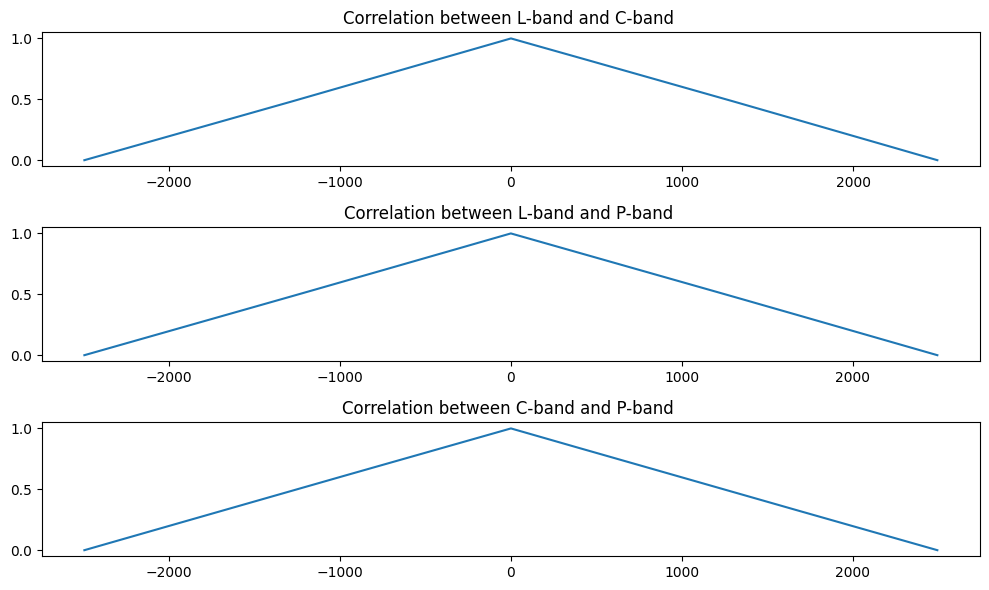

In [132]:
lags_LC = scipy.signal.correlation_lags(len(time_serie_1), len(time_serie_2), mode='full')

corr_LC = np.correlate(time_serie_1,time_serie_2,"full")
norm_factor_LC = np.sqrt(np.sum(time_serie_1**2) * np.sum(time_serie_2**2))
corr_normalized_LC = corr_LC / norm_factor_LC

lags_LP = scipy.signal.correlation_lags(len(time_serie_3), len(time_serie_2), mode='full')

corr_LP = np.correlate(time_serie_3,time_serie_2,"full")
norm_factor_LP = np.sqrt(np.sum(time_serie_3**2) * np.sum(time_serie_2**2))
corr_normalized_LP = corr_LP / norm_factor_LP

lags_CP = scipy.signal.correlation_lags(len(time_serie_3), len(time_serie_1), mode='full')

corr_CP = np.correlate(time_serie_3,time_serie_1,"full")
norm_factor_CP = np.sqrt(np.sum(time_serie_3**2) * np.sum(time_serie_1**2))
corr_normalized_CP = corr_CP / norm_factor_CP

fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].plot(lags_LC,corr_normalized_LC)
ax[0].set_title('Correlation between L-band and C-band ')
ax[1].plot(lags_LP,corr_normalized_LP)
ax[1].set_title('Correlation between L-band and P-band ')
ax[2].plot(lags_CP,corr_normalized_CP)
ax[2].set_title('Correlation between C-band and P-band ')

plt.tight_layout()

## Dendromètres

In [133]:
data_real = pd.read_csv('./data1.csv', sep=";")
data_real_2 = pd.read_csv('./data2.csv', sep=";")

#  Série 1
data_dendro = data_real.iloc[:, [0, 1, 6]].to_numpy()
time_serie = pd.Series(data_dendro[:, 2], dtype='float64')
time_serie = time_serie.dropna()

#  Série 2
data_dendro2 = data_real_2.iloc[:, [0, 1, 6]].to_numpy()
time_serie2 = pd.Series(data_dendro2[:, 2], dtype='float64')
time_serie2 = time_serie2.dropna()

df_crop = pd.DataFrame(data_dendro2)
df_crop = df_crop.drop_duplicates(subset=1, keep='first')

# Fenêtre d'observation série 1
data_crop = data_dendro[16656:24236,:] 
# time_serie_crop = pd.Series(data_crop[:,2], dtype='float64')

# Fenêtre d'observation série 2
data_crop2 = df_crop.iloc[10884:18464, :].to_numpy()
# time_serie_crop2 = pd.Series(data_crop2[:,2], dtype='float64')

# Datetime
data_crop[:,1] = [datetime.strptime(d, "%Y.%m.%d %H:%M") for d in data_crop[:,1]]
data_crop2[:,1] = [datetime.strptime(d, "%Y.%m.%d %H:%M") for d in data_crop2[:,1]]

In [134]:
print("Dates de début")
print(data_crop[2,1])
print(data[444,0])
print(data_crop2[2,1])
print(data2[444,0])
print(data3[444,0])

print("Dates de fin")
print(data_crop[-3,1])
print(data[-2,0])
print(data_crop2[-3,1])
print(data2[-1,0])
print(data3[-1,0])

mask_crop = np.isin(data_crop[2:-3, 1], data[444:-2, 0])
data_crop = data_crop[2:-3, :][mask_crop]

mask_crop2 = np.isin(data_crop2[2:-3, 1], data[444:-2, 0])
data_crop2 = data_crop2[2:-3, :][mask_crop]

print(len(data_crop[:,1]))
print(len(data_crop2[:,1]))
print(len(data[444:-2, 0]))

print(len(data2[444:-1, 0]))
print(len(data3[444:-1, 0]))

time_serie_crop = pd.Series(data_crop[:,2], dtype='float64')
time_serie_crop2 = pd.Series(data_crop2[:,2], dtype='float64')
time_serie_C = pd.Series(data[444:-1,1], dtype='float64')
time_serie_L = pd.Series(data2[444:-2,1], dtype='float64')
time_serie_P = pd.Series(data3[444:-2,1], dtype='float64')

Dates de début
2021-08-05 16:30:00
2021-08-05 16:30:00
2021-08-05 16:30:00
2021-08-05 16:30:00
2021-08-05 16:30:00
Dates de fin
2021-08-31 23:45:00
2021-08-31 23:45:00
2021-08-31 23:45:00
2021-08-31 23:45:00
2021-08-31 23:45:00
2494
2494
2494
2495
2495


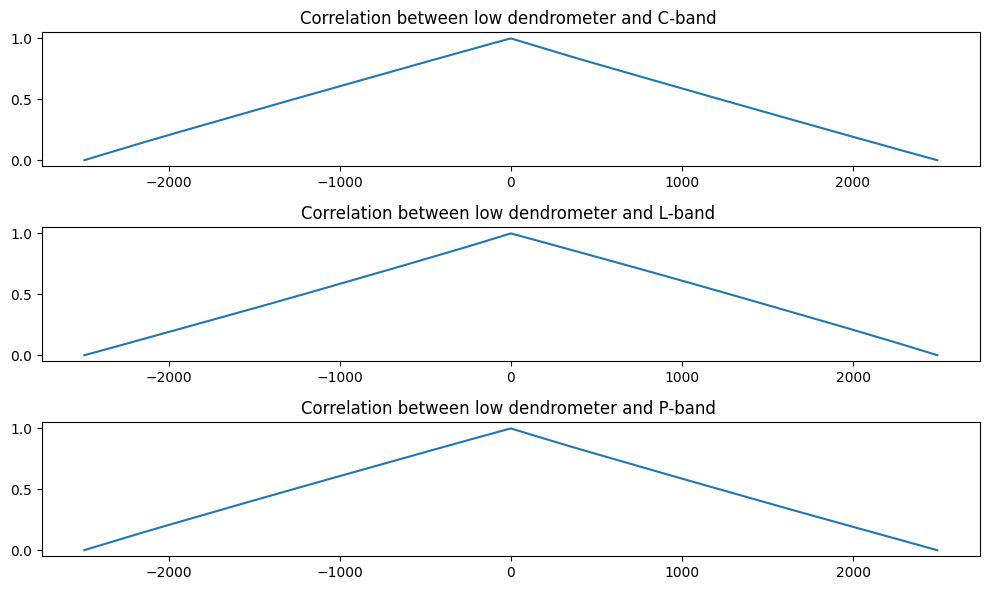

In [135]:
# Low dendrometer
lags_C = scipy.signal.correlation_lags(len(time_serie_C), len(time_serie_crop), mode='full')

corr_C = np.correlate(time_serie_C,time_serie_crop,"full")
norm_factor_C = np.sqrt(np.sum(time_serie_C**2) * np.sum(time_serie_crop**2))
corr_normalized_C = corr_C / norm_factor_C

lags_L = scipy.signal.correlation_lags(len(time_serie_L), len(time_serie_crop), mode='full')

corr_L = np.correlate(time_serie_crop,time_serie_L,"full")
norm_factor_L = np.sqrt(np.sum(time_serie_crop**2) * np.sum(time_serie_L**2))
corr_normalized_L = corr_L / norm_factor_L

lags_P = scipy.signal.correlation_lags(len(time_serie_P), len(time_serie_crop), mode='full')

corr_P = np.correlate(time_serie_P,time_serie_crop,"full")
norm_factor_P = np.sqrt(np.sum(time_serie_P**2) * np.sum(time_serie_crop**2))
corr_normalized_P = corr_P / norm_factor_P

fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].plot(lags_C,corr_normalized_C)
ax[0].set_title('Correlation between low dendrometer and C-band ')
ax[1].plot(lags_L,corr_normalized_L)
ax[1].set_title('Correlation between low dendrometer and L-band ')
ax[2].plot(lags_P,corr_normalized_P)
ax[2].set_title('Correlation between low dendrometer and P-band ')

plt.tight_layout()

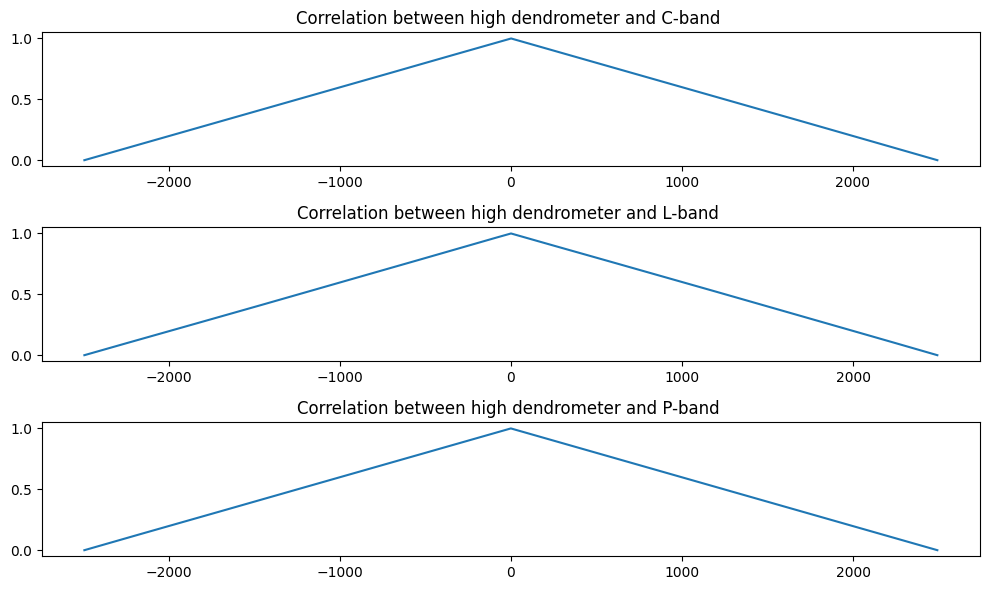

In [136]:
# High dendrometer
lags_C = scipy.signal.correlation_lags(len(time_serie_C), len(time_serie_crop2), mode='full')

corr_C = np.correlate(time_serie_C,time_serie_crop2,"full")
norm_factor_C = np.sqrt(np.sum(time_serie_C**2) * np.sum(time_serie_crop2**2))
corr_normalized_C = corr_C / norm_factor_C

lags_L = scipy.signal.correlation_lags(len(time_serie_L), len(time_serie_crop2), mode='full')

corr_L = np.correlate(time_serie_crop2,time_serie_L,"full")
norm_factor_L = np.sqrt(np.sum(time_serie_crop2**2) * np.sum(time_serie_L**2))
corr_normalized_L = corr_L / norm_factor_L

lags_P = scipy.signal.correlation_lags(len(time_serie_P), len(time_serie_crop2), mode='full')

corr_P = np.correlate(time_serie_P,time_serie_crop2,"full")
norm_factor_P = np.sqrt(np.sum(time_serie_P**2) * np.sum(time_serie_crop2**2))
corr_normalized_P = corr_P / norm_factor_P

fig, ax = plt.subplots(3,1, figsize=(10, 6))
ax[0].plot(lags_C,corr_normalized_C)
ax[0].set_title('Correlation between high dendrometer and C-band ')
ax[1].plot(lags_L,corr_normalized_L)
ax[1].set_title('Correlation between high dendrometer and L-band ')
ax[2].plot(lags_P,corr_normalized_P)
ax[2].set_title('Correlation between high dendrometer and P-band ')

plt.tight_layout()

## Transformée de Fourier

In [137]:
# Fonction qui permet de passer l'axe des abscisses en jours
def freq_to_day (freq) :
    return (1/freq)/(60*24*24)

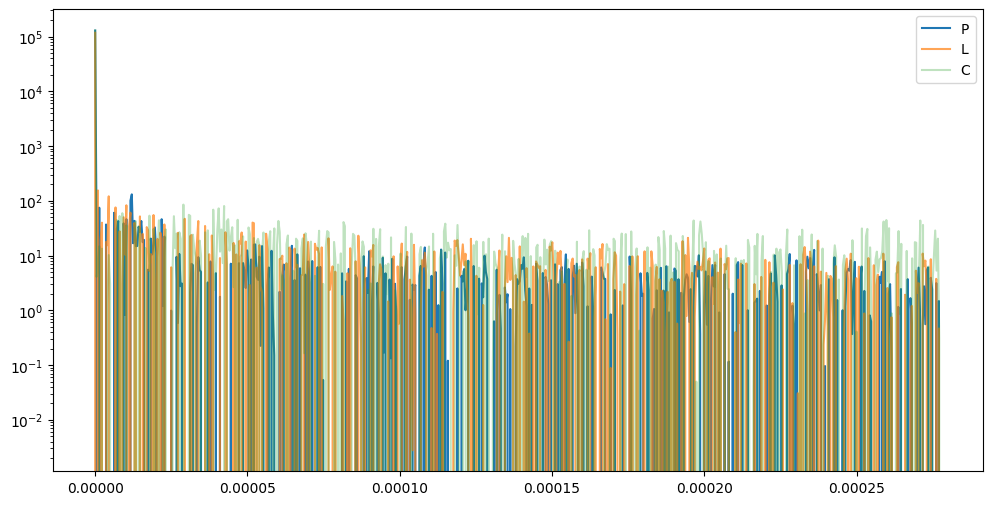

Période ayant la plus grande amplitude signal C : inf j
Période ayant la plus grande amplitude signal L : inf j
Période ayant la plus grande amplitude signal P : inf j


C:\Users\pduch\AppData\Local\Temp\ipykernel_29220\531498103.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1/freq)/(60*24*24)


In [138]:
amplitudes1 = np.real(np.fft.rfft(time_serie_1))
frequencies1 = np.fft.rfftfreq(len(time_serie_1),15*60)

amplitudes2 = np.real(np.fft.rfft(time_serie_2)) 
frequencies2 = np.fft.rfftfreq(len(time_serie_2),15*60)

amplitudes3 = np.real(np.fft.rfft(time_serie_3))
frequencies3 = np.fft.rfftfreq(len(time_serie_3),15*60)

plt.figure(figsize=(12, 6))
plt.semilogy(frequencies3[:len(frequencies3)//2], amplitudes3[:len(amplitudes3)//2], label='P')
plt.legend()
#plt.show()
#plt.figure(figsize=(12, 6))
plt.semilogy(frequencies2[:len(frequencies2)//2], amplitudes2[:len(amplitudes2)//2], label='L', alpha=0.7)
plt.legend()
#plt.show()
#plt.figure(figsize=(12, 6))
plt.semilogy(frequencies1[:len(frequencies1)//2], amplitudes1[:len(amplitudes1)//2], label='C', alpha=0.3)
plt.legend()
plt.show()


print("Période ayant la plus grande amplitude signal C :", freq_to_day(frequencies1[np.argmax(amplitudes1)]),"j" )
print("Période ayant la plus grande amplitude signal L :", freq_to_day(frequencies2[np.argmax(amplitudes2)]),"j" )
print("Période ayant la plus grande amplitude signal P :", freq_to_day(frequencies3[np.argmax(amplitudes3)]),"j" )


### Detection harmoniques par moyenne par chunk

Dans cette méthode nous nous interessons non plus à la plus grande valeur sur une taille de chunk donnée mais à la moyenne des amplitudes (et donc des fréquences).

Pour cela on va comparer nos résultats avec 2 tailles de chunk différentes.

In [139]:
def average_by_chunk(frequencies, amplitudes, chunk_size=50):
    # Calcul du nombre de blocs
    num_chunks = len(frequencies) // chunk_size
    avg_frequencies = []
    avg_amplitudes = []
    
    # Diviser en blocs et calculer la moyenne
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size
        
        # Sélectionner les indices du bloc
        chunk_frequencies = frequencies[start_idx:end_idx]
        chunk_amplitudes = amplitudes[start_idx:end_idx]
        
        # Calculer la fréquence moyenne (c'est la fréquence du centre du bloc)
        avg_frequency = np.mean(chunk_frequencies)
        
        # Calculer l'amplitude moyenne du bloc
        avg_amplitude = np.mean(chunk_amplitudes)
        
        avg_frequencies.append(avg_frequency)
        avg_amplitudes.append(avg_amplitude)
    
    return np.array(avg_frequencies), np.array(avg_amplitudes)


In [140]:
chunk_size = 90
frequencies1_avg_90, amplitudes1_avg_90 = average_by_chunk(frequencies1, amplitudes1, chunk_size)
frequencies2_avg_90, amplitudes2_avg_90 = average_by_chunk(frequencies2, amplitudes2, chunk_size)
frequencies3_avg_90, amplitudes3_avg_90 = average_by_chunk(frequencies3, amplitudes3, chunk_size)

print("Chunk size = 90")
print("Harmoniques détectées signal C:")
print(f"Fréquence : {frequencies1_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies1_avg_90[0]):.6f} jours, Amplitude : {amplitudes1_avg_90[0]:.2f}")
print("Harmoniques détectées signal L:")
print(f"Fréquence : {frequencies2_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies2_avg_90[0]):.6f} jours, Amplitude : {amplitudes2_avg_90[0]:.2f}")
print("Harmoniques détectées signal P:")
print(f"Fréquence : {frequencies3_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies3_avg_90[0]):.6f} jours, Amplitude : {amplitudes3_avg_90[0]:.2f}")


Chunk size = 90
Harmoniques détectées signal C:
Fréquence : 0.000020 Hz, Fréquence : 1.459504 jours, Amplitude : 1445.81
Harmoniques détectées signal L:
Fréquence : 0.000020 Hz, Fréquence : 1.460089 jours, Amplitude : 1301.82
Harmoniques détectées signal P:
Fréquence : 0.000020 Hz, Fréquence : 1.460089 jours, Amplitude : 1427.96


In [141]:
chunk_size = 120
frequencies1_avg_90, amplitudes1_avg_90 = average_by_chunk(frequencies1, amplitudes1, chunk_size)
frequencies2_avg_90, amplitudes2_avg_90 = average_by_chunk(frequencies2, amplitudes2, chunk_size)
frequencies3_avg_90, amplitudes3_avg_90 = average_by_chunk(frequencies3, amplitudes3, chunk_size)

print("Chunk size = 120")
print("Harmoniques détectées signal C:")
print(f"Fréquence : {frequencies1_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies1_avg_90[0]):.6f} jours, Amplitude : {amplitudes1_avg_90[0]:.2f}")
print("Harmoniques détectées signal L:")
print(f"Fréquence : {frequencies2_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies2_avg_90[0]):.6f} jours, Amplitude : {amplitudes2_avg_90[0]:.2f}")
print("Harmoniques détectées signal P:")
print(f"Fréquence : {frequencies3_avg_90[0]:.6f} Hz, Fréquence : {freq_to_day(frequencies3_avg_90[0]):.6f} jours, Amplitude : {amplitudes3_avg_90[0]:.2f}")

Chunk size = 120
Harmoniques détectées signal C:
Fréquence : 0.000027 Hz, Fréquence : 1.091562 jours, Amplitude : 1088.46
Harmoniques détectées signal L:
Fréquence : 0.000026 Hz, Fréquence : 1.091999 jours, Amplitude : 976.54
Harmoniques détectées signal P:
Fréquence : 0.000026 Hz, Fréquence : 1.091999 jours, Amplitude : 1070.54


## Densité spectrale Welch

Dans cette partie nous nous intéressons à la méthode de Welch qui est l'équivalent d'une transformée de Fourier mais qui permet d'obtenir de meilleurs résultats.

In [142]:
from scipy.signal import welch

c:\Users\pduch\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2880 is greater than input length  = 2494, using nperseg = 2494
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
c:\Users\pduch\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 2880 is greater than input length  = 2495, using nperseg = 2495
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


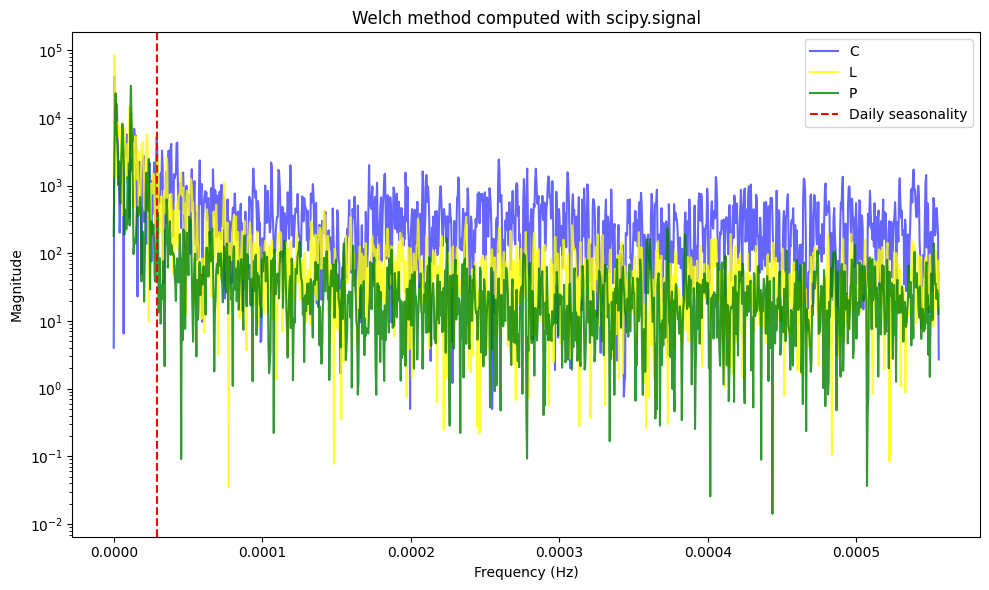

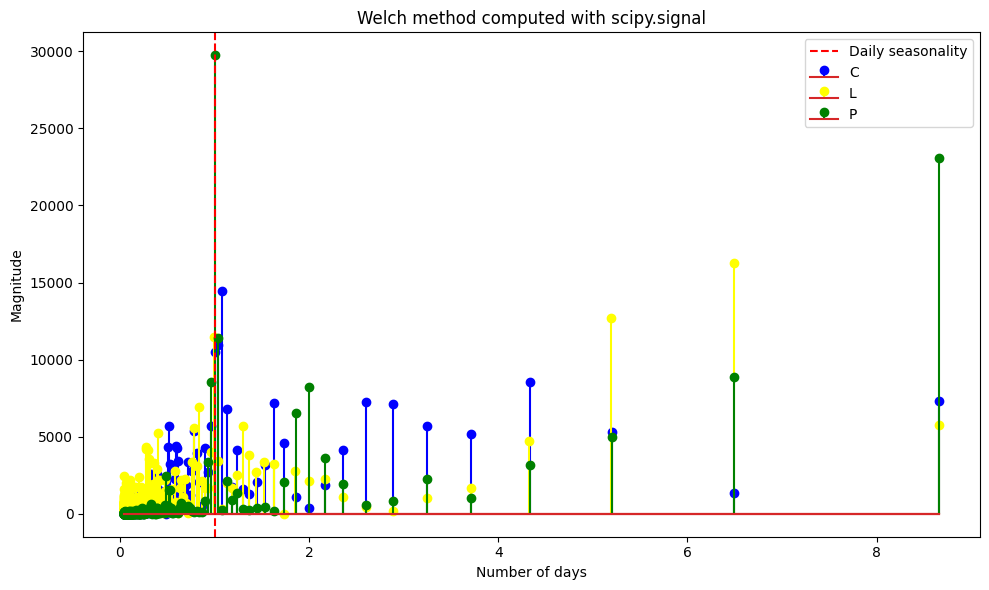

In [143]:
 #Paramètres de la méthode de Welch
nperseg = 2880 # 288
noverlap = int(nperseg/5)
fs = 1 / (60*15)

# Estimation de la PSD avec notre implémentation manuelle de Welch
frequencies_auto1, psd_auto1 = welch(time_serie_1, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")
frequencies_auto2, psd_auto2 = welch(time_serie_2, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")
frequencies_auto3, psd_auto3 = welch(time_serie_3, fs=fs, nperseg=nperseg , noverlap=noverlap, window="hann", scaling = "density")

# Tracé du résultat
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_auto1, np.abs(psd_auto1), label="C", color='blue', alpha = 0.6)
plt.semilogy(frequencies_auto2, np.abs(psd_auto2), label="L", color='yellow', alpha = 0.8)
plt.semilogy(frequencies_auto3, np.abs(psd_auto3), label="P", color='green', alpha = 0.8)
plt.axvline(x=1/(60*24*24), color='red', linestyle='--',label='Daily seasonality')
plt.title('Welch method computed with scipy.signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.stem(((1/frequencies_auto2[3:len(frequencies_auto2)//2])/(60*60*24)), np.abs(psd_auto2[3:len(psd_auto2)//2]), label="C", linefmt='blue')
plt.stem(((1/frequencies_auto1[3:len(frequencies_auto1)//2])/(60*60*24)), np.abs(psd_auto1[3:len(psd_auto1)//2]), label="L", linefmt='yellow')
plt.stem(((1/frequencies_auto3[3:len(frequencies_auto3)//2])/(60*60*24)), np.abs(psd_auto3[3:len(psd_auto3)//2]), label="P", linefmt='green')
plt.axvline(x=1, color='red', linestyle='--',label='Daily seasonality')
plt.title('Welch method computed with scipy.signal')
plt.xlabel('Number of days')
plt.ylabel('Magnitude')
plt.legend()
plt.tight_layout()
plt.show()


In [144]:
max_psd_index1 = np.argmax(np.abs(psd_auto1))
max_psd_frequency1 = frequencies_auto1[max_psd_index1]

max_psd_index2 = np.argmax(np.abs(psd_auto2))
max_psd_frequency2 = frequencies_auto2[max_psd_index2]

max_psd_index3 = np.argmax(np.abs(psd_auto3))
max_psd_frequency3 = frequencies_auto3[max_psd_index3]


# Afficher la fréquence avec la plus grande PSD
print("---- Premiere PSD -----")
print(f"Fréquence avec la plus grande PSD pour C : {(1/max_psd_frequency1)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour L : {(1/max_psd_frequency2)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour P : {(1/max_psd_frequency3)/(60*60*24)} j")

psd_auto1_without_max = np.abs(psd_auto1).copy()  
psd_auto1_without_max[max_psd_index1] = -np.inf  
second_max_psd_index1 = np.argmax(psd_auto1_without_max)  
second_max_psd_frequency1 = frequencies_auto1[second_max_psd_index1]  

psd_auto2_without_max = np.abs(psd_auto2).copy()  
psd_auto2_without_max[max_psd_index2] = -np.inf  
second_max_psd_index2 = np.argmax(psd_auto2_without_max)  
second_max_psd_frequency2 = frequencies_auto2[second_max_psd_index2]

psd_auto3_without_max = np.abs(psd_auto3).copy()  
psd_auto3_without_max[max_psd_index3] = -np.inf  
second_max_psd_index3 = np.argmax(psd_auto3_without_max)  
second_max_psd_frequency3 = frequencies_auto3[second_max_psd_index3]

print("---- Deuxieme PSD -----")
print(f"Fréquence avec la plus grande PSD pour C : {(1/second_max_psd_frequency1)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour L : {(1/second_max_psd_frequency2)/(60*60*24)} j")
print(f"Fréquence avec la plus grande PSD pour P : {(1/second_max_psd_frequency3)/(60*60*24)} j")

---- Premiere PSD -----
Fréquence avec la plus grande PSD pour C : 25.979166666666668 j
Fréquence avec la plus grande PSD pour L : 25.989583333333332 j
Fréquence avec la plus grande PSD pour P : 0.9995993589743589 j
---- Deuxieme PSD -----
Fréquence avec la plus grande PSD pour C : 6.494791666666667 j
Fréquence avec la plus grande PSD pour L : 12.994791666666666 j
Fréquence avec la plus grande PSD pour P : 8.663194444444445 j


# Modélisation des séries temporelles

Une fois l'étape de décomposition spectrale réalisée on va maintenant regarde comment modéliser ces signaux à l'aide de différentes librairies mais aussi à la main.

### Modélisation avec la librairie STL

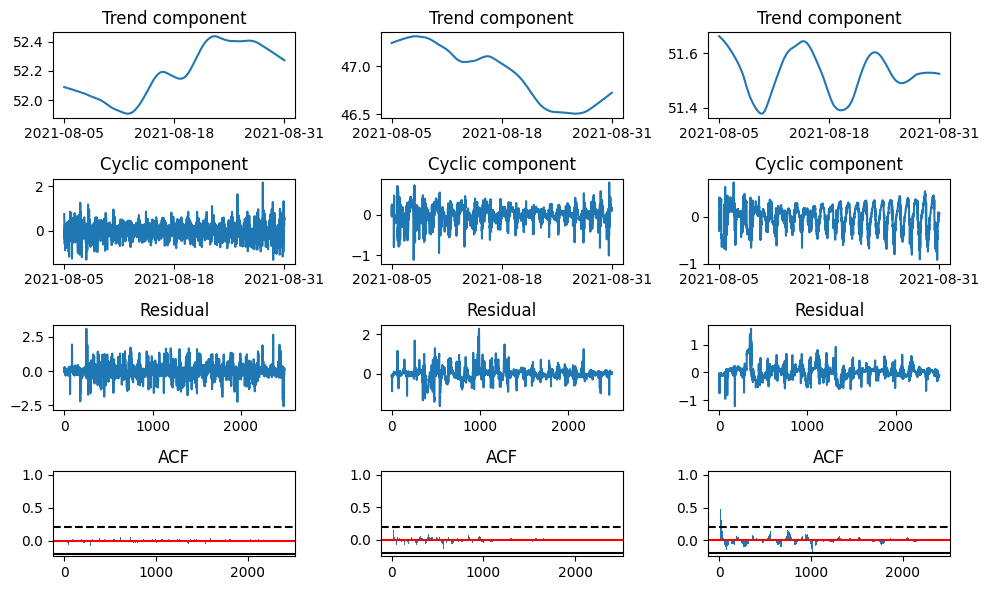

In [145]:
stl1 = STL(time_serie_1, period=288, robust = True)
result_stl1 = stl1.fit()

stl2 = STL(time_serie_2, period=288, robust = True)
result_stl2 = stl2.fit()

stl3 = STL(time_serie_3, period=288, robust = True)
result_stl3 = stl3.fit()

max_lag = 2400
acf_values_1 = sm.tsa.acf(result_stl1.resid, nlags = max_lag)
acf_values_2 = sm.tsa.acf(result_stl2.resid, nlags = max_lag)
acf_values_3 = sm.tsa.acf(result_stl3.resid, nlags = max_lag)

fig, ax = plt.subplots(4, 3, figsize=(10, 6))

num_ticks = 3
datetime_data = data2[444:-1,0]
x_positions = np.linspace(0, len(datetime_data) - 1, num_ticks, dtype=int)
x_labels = [datetime_data[i] for i in x_positions]

ax[0,0].plot(datetime_data[:-1],result_stl1.trend)
ax[0,0].set_xticks(x_labels)
ax[0,0].set_title('Trend component')
ax[1,0].plot(datetime_data[:-1],result_stl1.seasonal)
ax[1,0].set_xticks(x_labels)
ax[1,0].set_title('Cyclic component')
ax[2,0].plot(result_stl1.resid)
ax[2,0].set_title('Residual')

ax[0,1].plot(datetime_data,result_stl2.trend)
ax[0,1].set_xticks(x_labels)
ax[0,1].set_title('Trend component')
ax[1,1].plot(datetime_data,result_stl2.seasonal)
ax[1,1].set_xticks(x_labels)
ax[1,1].set_title('Cyclic component')
ax[2,1].plot(result_stl2.resid)
ax[2,1].set_title('Residual')

ax[0,2].plot(datetime_data,result_stl3.trend)
ax[0,2].set_xticks(x_labels)
ax[0,2].set_title('Trend component')
ax[1,2].plot(datetime_data,result_stl3.seasonal)
ax[1,2].set_xticks(x_labels)
ax[1,2].set_title('Cyclic component')
ax[2,2].plot(result_stl3.resid)
ax[2,2].set_title('Residual')

ax[3,0].bar(range(max_lag + 1), acf_values_1)
ax[3,0].axhline(y=0.2, color='black', linestyle='--')
ax[3,0].axhline(y=0, color='red')
ax[3,0].axhline(y=-0.2, color='black')
ax[3,0].set_title('ACF')

ax[3,1].bar(range(max_lag + 1), acf_values_2)
ax[3,1].axhline(y=0.2, color='black', linestyle='--')
ax[3,1].axhline(y=0, color='red')
ax[3,1].axhline(y=-0.2, color='black')
ax[3,1].set_title('ACF')

ax[3,2].bar(range(max_lag + 1), acf_values_3)
ax[3,2].axhline(y=0.2, color='black', linestyle='--')
ax[3,2].axhline(y=0, color='red')
ax[3,2].axhline(y=-0.2, color='black')
ax[3,2].set_title('ACF')

plt.tight_layout()
plt.show()

**Observation**

Avec cette méthode, on peut observer que les résidus correspondent bien à des bruits blancs car leur autocorrélation ne présente qu'un seul pic supérieur à 0.2.

#### Intercorrelation

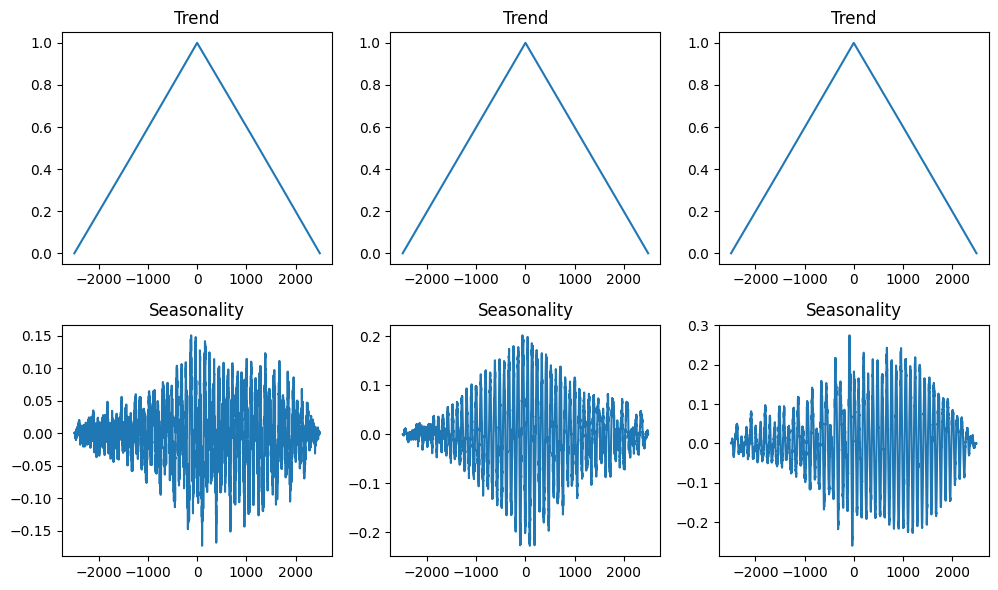

In [146]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))

lags_12 = scipy.signal.correlation_lags(len(result_stl1.trend), len(result_stl2.trend), mode='full')
corr_t_12 = scipy.signal.correlate(result_stl1.trend,result_stl2.trend)
norm_factor_12 = np.sqrt(np.sum(result_stl1.trend**2) * np.sum(result_stl2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12
lags_13 = scipy.signal.correlation_lags(len(result_stl1.trend), len(result_stl3.trend), mode='full')
corr_t_13 = scipy.signal.correlate(result_stl1.trend,result_stl3.trend)
norm_factor_13 = np.sqrt(np.sum(result_stl1.trend**2) * np.sum(result_stl3.trend**2))
corr_t_normalized_13 = corr_t_13 / norm_factor_13
lags_32 = scipy.signal.correlation_lags(len(result_stl3.trend), len(result_stl2.trend), mode='full')
corr_t_32 = scipy.signal.correlate(result_stl3.trend,result_stl2.trend)
norm_factor_32 = np.sqrt(np.sum(result_stl3.trend**2) * np.sum(result_stl2.trend**2))
corr_t_normalized_32 = corr_t_32 / norm_factor_32

ax[0,0].plot(lags_12,corr_t_normalized_12)
ax[0,0].set_title('Trend')
ax[0,1].plot(lags_13,corr_t_normalized_13)
ax[0,1].set_title('Trend')
ax[0,2].plot(lags_32,corr_t_normalized_32)
ax[0,2].set_title('Trend')

lags_12 = scipy.signal.correlation_lags(len(result_stl1.seasonal), len(result_stl2.seasonal), mode='full')
corr_s_12 = scipy.signal.correlate(result_stl1.seasonal,result_stl2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_stl1.seasonal**2) * np.sum(result_stl2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12
lags_13 = scipy.signal.correlation_lags(len(result_stl1.seasonal), len(result_stl3.seasonal), mode='full')
corr_s_13 = scipy.signal.correlate(result_stl1.seasonal,result_stl3.seasonal)
norm_factor_13 = np.sqrt(np.sum(result_stl1.seasonal**2) * np.sum(result_stl3.seasonal**2))
corr_s_normalized_13 = corr_s_13 / norm_factor_13
lags_32 = scipy.signal.correlation_lags(len(result_stl3.seasonal), len(result_stl2.seasonal), mode='full')
corr_s_32 = scipy.signal.correlate(result_stl3.seasonal,result_stl2.seasonal)
norm_factor_32 = np.sqrt(np.sum(result_stl3.seasonal**2) * np.sum(result_stl2.seasonal**2))
corr_s_normalized_32 = corr_s_32 / norm_factor_32

ax[1,0].plot(lags_12,corr_s_normalized_12)
ax[1,0].set_title('Seasonality')
ax[1,1].plot(lags_13,corr_s_normalized_13)
ax[1,1].set_title('Seasonality')
ax[1,2].plot(lags_32,corr_s_normalized_32)
ax[1,2].set_title('Seasonality')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cyclic correlations')

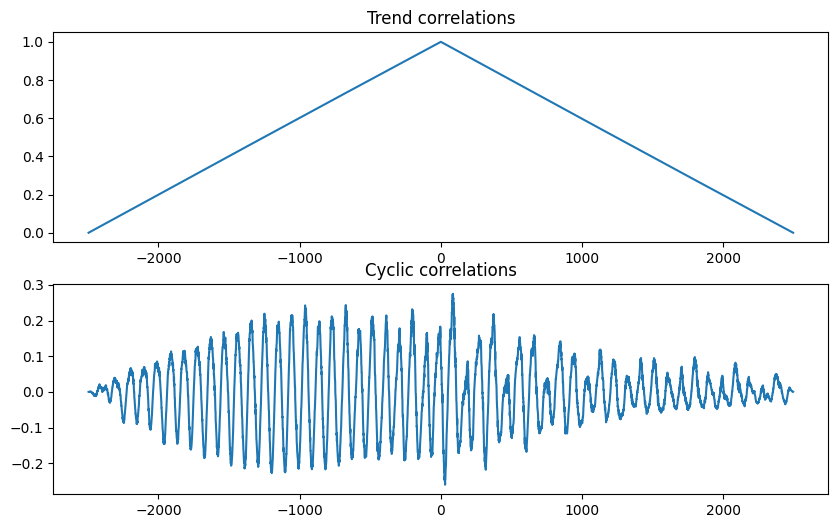

In [163]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))

lags_12 = scipy.signal.correlation_lags(len(result_stl2.trend), len(result_stl3.trend), mode='full')
corr_t_12 = scipy.signal.correlate(result_stl2.trend,result_stl3.trend)
norm_factor_12 = np.sqrt(np.sum(result_stl2.trend**2) * np.sum(result_stl3.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12

ax[0].plot(lags_12,corr_t_normalized_12)
ax[0].set_title('Trend correlations')

lags_12 = scipy.signal.correlation_lags(len(result_stl2.seasonal), len(result_stl3.seasonal), mode='full')
corr_s_12 = scipy.signal.correlate(result_stl2.seasonal,result_stl3.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_stl2.seasonal**2) * np.sum(result_stl3.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12

ax[1].plot(lags_12,corr_s_normalized_12)
ax[1].set_title('Cyclic correlations')

### Modélisation avec la librairie MSTL

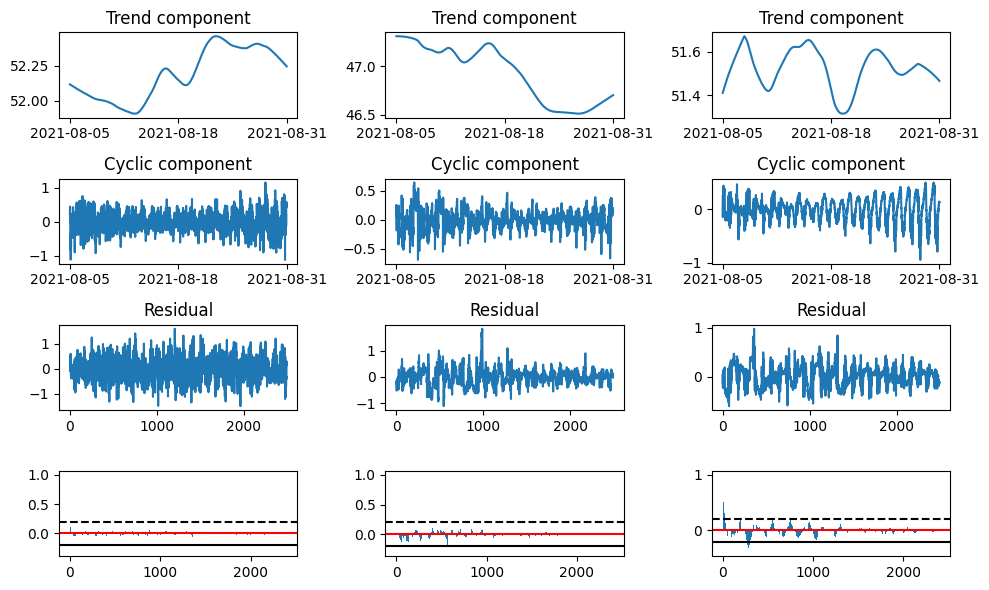

In [148]:
from statsmodels.tsa.seasonal import MSTL

mstl1 = MSTL(time_serie_1, periods=288)
result_mstl1 = mstl1.fit()

mstl2 = MSTL(time_serie_2, periods=288)
result_mstl2 = mstl2.fit()

mstl3 = MSTL(time_serie_3, periods=288)
result_mstl3 = mstl3.fit()

max_lag = 2400
acf_values_1 = sm.tsa.acf(result_mstl1.resid, nlags = max_lag)
acf_values_2 = sm.tsa.acf(result_mstl2.resid, nlags = max_lag)
acf_values_3 = sm.tsa.acf(result_mstl3.resid, nlags = max_lag)

fig, ax = plt.subplots(4, 3, figsize=(10, 6))

ax[0,0].plot(datetime_data[:-1],result_mstl1.trend)
ax[0,0].set_xticks(x_labels)
ax[0,0].set_title('Trend component')
ax[1,0].plot(datetime_data[:-1],result_mstl1.seasonal)
ax[1,0].set_xticks(x_labels)
ax[1,0].set_title('Cyclic component')
ax[2,0].plot(result_mstl1.resid)
ax[2,0].set_title('Residual')

ax[0,1].plot(datetime_data,result_mstl2.trend)
ax[0,1].set_xticks(x_labels)
ax[0,1].set_title('Trend component')
ax[1,1].plot(datetime_data,result_mstl2.seasonal)
ax[1,1].set_xticks(x_labels)
ax[1,1].set_title('Cyclic component')
ax[2,1].plot(result_mstl2.resid)
ax[2,1].set_title('Residual')

ax[0,2].plot(datetime_data,result_mstl3.trend)
ax[0,2].set_xticks(x_labels)
ax[0,2].set_title('Trend component')
ax[1,2].plot(datetime_data,result_mstl3.seasonal)
ax[1,2].set_xticks(x_labels)
ax[1,2].set_title('Cyclic component')
ax[2,2].plot(result_mstl3.resid)
ax[2,2].set_title('Residual')

ax[3,0].bar(range(max_lag + 1), acf_values_1)
ax[3,0].axhline(y=0.2, color='black', linestyle='--')
ax[3,0].axhline(y=0, color='red')
ax[3,0].axhline(y=-0.2, color='black')

ax[3,1].bar(range(max_lag + 1), acf_values_2)
ax[3,1].axhline(y=0.2, color='black', linestyle='--')
ax[3,1].axhline(y=0, color='red')
ax[3,1].axhline(y=-0.2, color='black')

ax[3,2].bar(range(max_lag + 1), acf_values_3)
ax[3,2].axhline(y=0.2, color='black', linestyle='--')
ax[3,2].axhline(y=0, color='red')
ax[3,2].axhline(y=-0.2, color='black')

plt.tight_layout()
plt.show()

**Observation**

Avec cette méthode, on peut observer que les résidus correspondent bien à des bruits blancs car leur autocorrélation ne présente qu'un seul pic supérieur à 0.2.

#### Intercorrelation

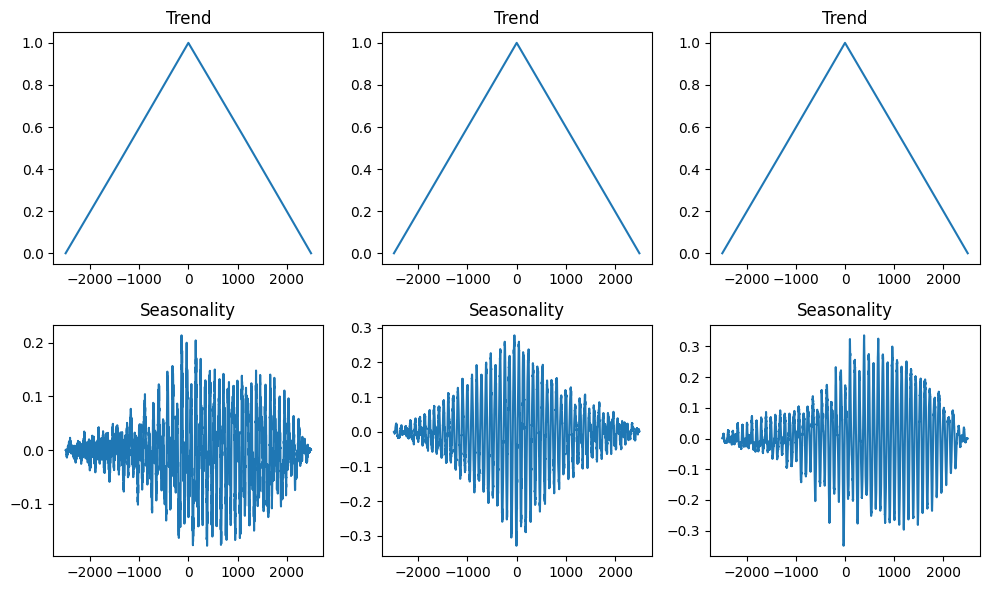

In [149]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))

lags_12 = scipy.signal.correlation_lags(len(result_mstl1.trend), len(result_mstl2.trend), mode='full')
corr_t_12 = scipy.signal.correlate(result_mstl1.trend,result_mstl2.trend)
norm_factor_12 = np.sqrt(np.sum(result_mstl1.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12
lags_13 = scipy.signal.correlation_lags(len(result_mstl1.trend), len(result_mstl3.trend), mode='full')
corr_t_13 = scipy.signal.correlate(result_mstl1.trend,result_mstl3.trend)
norm_factor_13 = np.sqrt(np.sum(result_mstl1.trend**2) * np.sum(result_mstl3.trend**2))
corr_t_normalized_13 = corr_t_13 / norm_factor_13
lags_32 = scipy.signal.correlation_lags(len(result_mstl3.trend), len(result_mstl2.trend), mode='full')
corr_t_32 = scipy.signal.correlate(result_mstl3.trend,result_mstl2.trend)
norm_factor_32 = np.sqrt(np.sum(result_mstl3.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_32 = corr_t_32 / norm_factor_32

ax[0,0].plot(lags_12,corr_t_normalized_12)
ax[0,0].set_title('Trend')
ax[0,1].plot(lags_13,corr_t_normalized_13)
ax[0,1].set_title('Trend')
ax[0,2].plot(lags_32,corr_t_normalized_32)
ax[0,2].set_title('Trend')

lags_12 = scipy.signal.correlation_lags(len(result_mstl1.seasonal), len(result_mstl2.seasonal), mode='full')
corr_s_12 = scipy.signal.correlate(result_mstl1.seasonal,result_mstl2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_mstl1.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12
lags_13 = scipy.signal.correlation_lags(len(result_mstl1.seasonal), len(result_mstl3.seasonal), mode='full')
corr_s_13 = scipy.signal.correlate(result_mstl1.seasonal,result_mstl3.seasonal)
norm_factor_13 = np.sqrt(np.sum(result_mstl1.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_s_normalized_13 = corr_s_13 / norm_factor_13
lags_32 = scipy.signal.correlation_lags(len(result_mstl3.seasonal), len(result_mstl2.seasonal), mode='full')
corr_s_32 = scipy.signal.correlate(result_mstl3.seasonal,result_mstl2.seasonal)
norm_factor_32 = np.sqrt(np.sum(result_mstl3.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_s_normalized_32 = corr_s_32 / norm_factor_32

ax[1,0].plot(lags_12,corr_s_normalized_12)
ax[1,0].set_title('Seasonality')
ax[1,1].plot(lags_13,corr_s_normalized_13)
ax[1,1].set_title('Seasonality')
ax[1,2].plot(lags_32,corr_s_normalized_32)
ax[1,2].set_title('Seasonality')


plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Cyclic correlations')

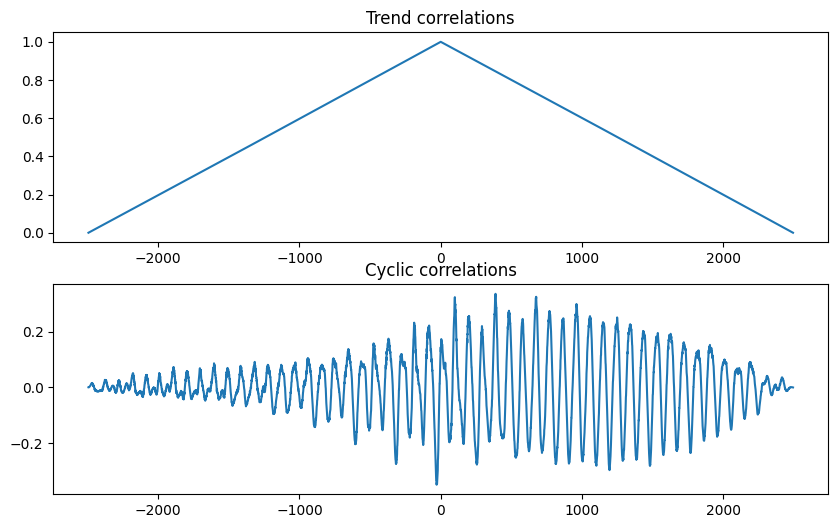

: 

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))

lags_12 = scipy.signal.correlation_lags(len(result_mstl3.trend), len(result_mstl2.trend), mode='full')
corr_t_12 = scipy.signal.correlate(result_mstl3.trend,result_mstl2.trend)
norm_factor_12 = np.sqrt(np.sum(result_mstl3.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_12 = corr_t_12 / norm_factor_12

ax[0].plot(lags_12,corr_t_normalized_12)
ax[0].set_title('Trend correlations')

lags_12 = scipy.signal.correlation_lags(len(result_mstl3.seasonal), len(result_mstl2.seasonal), mode='full')
corr_s_12 = scipy.signal.correlate(result_mstl3.seasonal,result_mstl2.seasonal)
norm_factor_12 = np.sqrt(np.sum(result_mstl3.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_s_normalized_12 = corr_s_12 / norm_factor_12

ax[1].plot(lags_12,corr_s_normalized_12)
ax[1].set_title('Cyclic correlations')

Text(0.5, 1.0, 'Seasonality P-L')

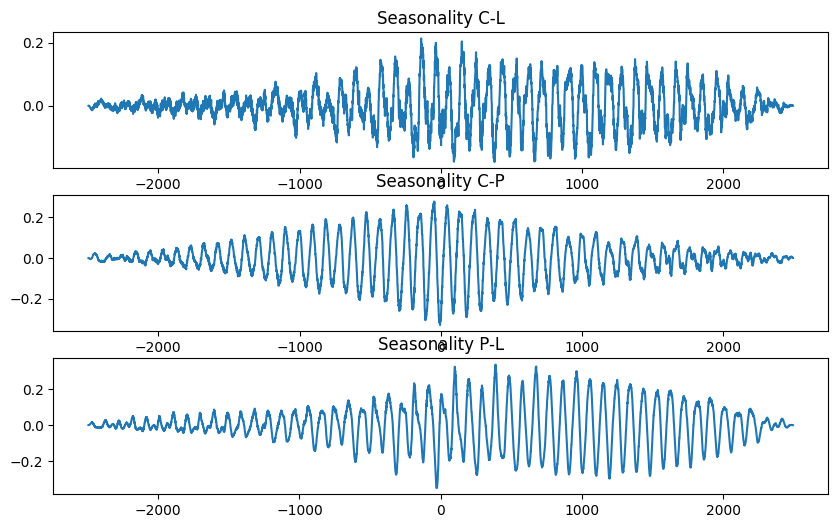

In [151]:
fig, ax = plt.subplots(3,1, figsize=(10, 6))

ax[0].plot(lags_12,corr_s_normalized_12)
ax[0].set_title('Seasonality C-L')
ax[1].plot(lags_13,corr_s_normalized_13)
ax[1].set_title('Seasonality C-P')
ax[2].plot(lags_32,corr_s_normalized_32)
ax[2].set_title('Seasonality P-L')

# Analyse de la saisonnalité (périodes et déphasage)

On cherche dans cette méthode à comparer les saisonnalités obtenues pour les 2 signaux. En efffet on est censés retrouvé une période correspondant à un jour. Cependant, les dendromètres ne sont pas placés à la même hauteur donc on s'attend à observer une différence de phase.

## STL

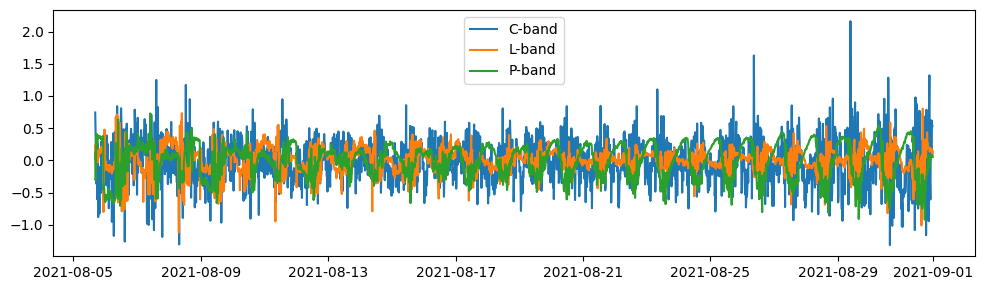

In [152]:
plt.figure(figsize=(10, 3))
plt.plot(datetime_data[:-1],result_stl1.seasonal, label = "C-band")
plt.plot(datetime_data,result_stl2.seasonal, label = "L-band")
plt.plot(datetime_data,result_stl3.seasonal, label = "P-band")
plt.legend()
plt.tight_layout()
plt.show()

In [153]:
seasonal1 = result_stl1.seasonal
seasonal2 = result_stl2.seasonal
seasonal3 = result_stl3.seasonal

amplitudes1 = np.real(np.fft.rfft(seasonal1))
frequencies1 = np.fft.rfftfreq(len(seasonal1),5*60) 
amplitudes2 = np.real(np.fft.rfft(seasonal2))
frequencies2 = np.fft.rfftfreq(len(seasonal2),5*60) 
amplitudes3 = np.real(np.fft.rfft(seasonal3))
frequencies3 = np.fft.rfftfreq(len(seasonal3),5*60) 

peaks1, _ = scipy.signal.find_peaks(amplitudes1, height=np.mean(amplitudes1) * 0.03)
frequence_principale1 = frequencies1[peaks1[0]] 
periode_principale1 = 1 / frequence_principale1
peaks2, _ = scipy.signal.find_peaks(amplitudes2, height=np.mean(amplitudes2) * 0.03)
frequence_principale2 = frequencies2[peaks2[0]] 
periode_principale2 = 1 / frequence_principale2
peaks3, _ = scipy.signal.find_peaks(amplitudes3, height=np.mean(amplitudes3) * 0.03)
frequence_principale3 = frequencies3[peaks3[0]] 
periode_principale3 = 1 / frequence_principale3

print(f"C-band --> Fréquence dominante : {frequence_principale1*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale1 / (3600*24):.2f} jours")
print(f"L-band --> Fréquence dominante : {frequence_principale2*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale2 / (3600*24):.2f} jours")
print(f"P-band --> Fréquence dominante : {frequence_principale3*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale3 / (3600*24):.2f} jours")

C-band --> Fréquence dominante : 1336.54103 1e-8 Hz, soit une période d'environ 0.87 jours
L-band --> Fréquence dominante : 1336.00534 1e-8 Hz, soit une période d'environ 0.87 jours
P-band --> Fréquence dominante : 1469.60588 1e-8 Hz, soit une période d'environ 0.79 jours


In [154]:
# Détection des pics des deux signaux
peaks1, _ = scipy.signal.find_peaks(seasonal1)
peaks2, _ = scipy.signal.find_peaks(seasonal2)
peaks3, _ = scipy.signal.find_peaks(seasonal3)

# Calcul du temps des premiers pics (déphasage temporel)
time_peak1 = datetime_data[peaks1[0]]  # Premier pic du signal 1
time_peak2 = datetime_data[peaks2[0]]  # Premier pic du signal 2
time_peak3 = datetime_data[peaks3[0]]  # Premier pic du signal 2

# Déphasage temporel
delta_t_12 = (time_peak2 - time_peak1).total_seconds()
delta_t_13 = (time_peak3 - time_peak1).total_seconds()
delta_t_32 = (time_peak2 - time_peak3).total_seconds()

print(f"Déphasage entre C et L : {delta_t_12/60:.1f} min")
print(f"Déphasage entre C et P : {delta_t_13/60:.1f} min")
print(f"Déphasage entre P et L : {delta_t_32/60:.1f} min")

Déphasage entre C et L : -30.0 min
Déphasage entre C et P : 15.0 min
Déphasage entre P et L : -45.0 min


## MSTL

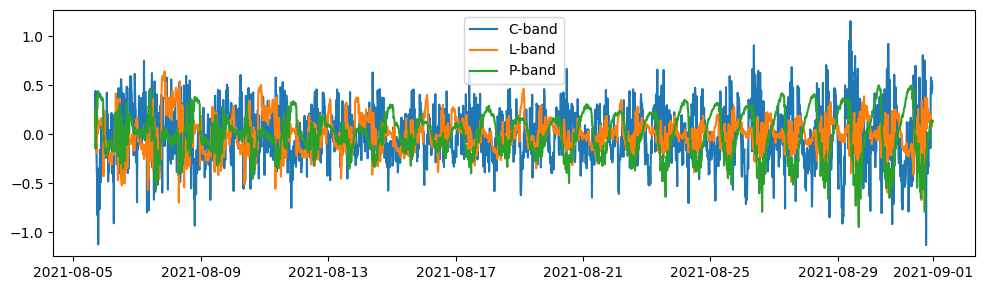

In [155]:
plt.figure(figsize=(10, 3))
plt.plot(datetime_data[:-1],result_mstl1.seasonal, label = "C-band")
plt.plot(datetime_data,result_mstl2.seasonal, label = "L-band")
plt.plot(datetime_data,result_mstl3.seasonal, label = "P-band")
plt.legend()
plt.tight_layout()
plt.show()

In [156]:
seasonal1 = result_mstl1.seasonal
seasonal2 = result_mstl2.seasonal
seasonal3 = result_mstl3.seasonal

amplitudes1 = np.real(np.fft.rfft(seasonal1))
frequencies1 = np.fft.rfftfreq(len(seasonal1),5*60) 
amplitudes2 = np.real(np.fft.rfft(seasonal2))
frequencies2 = np.fft.rfftfreq(len(seasonal2),5*60) 
amplitudes3 = np.real(np.fft.rfft(seasonal3))
frequencies3 = np.fft.rfftfreq(len(seasonal3),5*60) 

peaks1, _ = scipy.signal.find_peaks(amplitudes1, height=np.mean(amplitudes1) * 0.03)
frequence_principale1 = frequencies1[peaks1[0]] 
periode_principale1 = 1 / frequence_principale1
peaks2, _ = scipy.signal.find_peaks(amplitudes2, height=np.mean(amplitudes2) * 0.03)
frequence_principale2 = frequencies2[peaks2[0]] 
periode_principale2 = 1 / frequence_principale2
peaks3, _ = scipy.signal.find_peaks(amplitudes3, height=np.mean(amplitudes3) * 0.03)
frequence_principale3 = frequencies3[peaks3[0]] 
periode_principale3 = 1 / frequence_principale3

print(f"C-band --> Fréquence dominante : {frequence_principale1*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale1 / (3600*24):.2f} jours")
print(f"L-band --> Fréquence dominante : {frequence_principale2*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale2 / (3600*24):.2f} jours")
print(f"P-band --> Fréquence dominante : {frequence_principale3*1e8:.5f} 1e-8 Hz, soit une période d'environ {periode_principale3 / (3600*24):.2f} jours")

C-band --> Fréquence dominante : 1336.54103 1e-8 Hz, soit une période d'environ 0.87 jours
L-band --> Fréquence dominante : 1336.00534 1e-8 Hz, soit une période d'environ 0.87 jours
P-band --> Fréquence dominante : 1068.80428 1e-8 Hz, soit une période d'environ 1.08 jours


In [157]:
# Détection des pics des deux signaux
peaks1, _ = scipy.signal.find_peaks(seasonal1)
peaks2, _ = scipy.signal.find_peaks(seasonal2)
peaks3, _ = scipy.signal.find_peaks(seasonal3)

# Calcul du temps des premiers pics (déphasage temporel)
time_peak1 = datetime_data[peaks1[0]]  # Premier pic du signal 1
time_peak2 = datetime_data[peaks2[0]]  # Premier pic du signal 2
time_peak3 = datetime_data[peaks3[0]]  # Premier pic du signal 2

# Déphasage temporel
delta_t_12 = (time_peak2 - time_peak1).total_seconds()
delta_t_13 = (time_peak3 - time_peak1).total_seconds()
delta_t_32 = (time_peak2 - time_peak3).total_seconds()

print(f"Déphasage entre C et L : {delta_t_12/60:.1f} min")
print(f"Déphasage entre C et P : {delta_t_13/60:.1f} min")
print(f"Déphasage entre P et L : {delta_t_32/60:.1f} min")

Déphasage entre C et L : 0.0 min
Déphasage entre C et P : 30.0 min
Déphasage entre P et L : -30.0 min


# Cross-correlations with dendrometers

In [158]:
from statsmodels.tsa.seasonal import MSTL

mstllow = MSTL(time_serie_crop, periods=288)
result_mstllow = mstllow.fit()

mstlhigh = MSTL(time_serie_crop2, periods=288)
result_mstlhigh = mstlhigh.fit()

## Low dendrometer

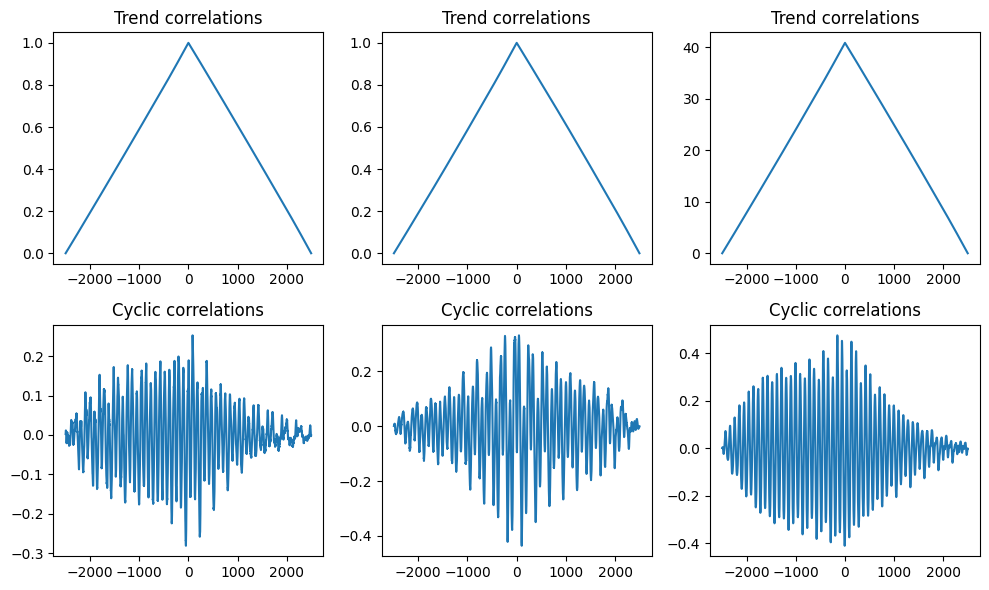

In [159]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))

lags_1 = scipy.signal.correlation_lags(len(result_mstllow.trend), len(result_mstl1.trend), mode='full')
corr_t_1 = scipy.signal.correlate(result_mstllow.trend,result_mstl1.trend)
norm_factor_1 = np.sqrt(np.sum(result_mstllow.trend**2) * np.sum(result_mstl1.trend**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1
lags_2 = scipy.signal.correlation_lags(len(result_mstllow.trend), len(result_mstl2.trend), mode='full')
corr_t_2 = scipy.signal.correlate(result_mstllow.trend,result_mstl2.trend)
norm_factor_2 = np.sqrt(np.sum(result_mstllow.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_2 = corr_t_2 / norm_factor_2
lags_3 = scipy.signal.correlation_lags(len(result_mstllow.trend), len(result_mstl3.trend), mode='full')
corr_t_3 = scipy.signal.correlate(result_mstllow.trend,result_mstl3.trend)
norm_factor_3 = np.sqrt(np.sum(result_mstllow.trend) * np.sum(result_mstl3.trend**2))
corr_t_normalized_3 = corr_t_3 / norm_factor_3


ax[0,0].plot(lags_1,corr_t_normalized_1)
ax[0,0].set_title('Trend correlations')
ax[0,1].plot(lags_2,corr_t_normalized_2)
ax[0,1].set_title('Trend correlations')
ax[0,2].plot(lags_3,corr_t_normalized_3)
ax[0,2].set_title('Trend correlations')

lags_1 = scipy.signal.correlation_lags(len(result_mstllow.seasonal), len(result_mstl1.seasonal), mode='full')
corr_t_1 = scipy.signal.correlate(result_mstllow.seasonal,result_mstl1.seasonal)
norm_factor_1 = np.sqrt(np.sum(result_mstllow.seasonal**2) * np.sum(result_mstl1.seasonal**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1
lags_2 = scipy.signal.correlation_lags(len(result_mstllow.seasonal), len(result_mstl2.seasonal), mode='full')
corr_t_2 = scipy.signal.correlate(result_mstllow.seasonal,result_mstl2.seasonal)
norm_factor_2 = np.sqrt(np.sum(result_mstllow.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_t_normalized_2 = corr_t_2 / norm_factor_2
lags_3 = scipy.signal.correlation_lags(len(result_mstllow.seasonal), len(result_mstl3.seasonal), mode='full')
corr_t_3 = scipy.signal.correlate(result_mstllow.seasonal,result_mstl3.seasonal)
norm_factor_3 = np.sqrt(np.sum(result_mstllow.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_t_normalized_3 = corr_t_3 / norm_factor_3

ax[1,0].plot(lags_1,corr_t_normalized_1)
ax[1,0].set_title('Cyclic correlations')
ax[1,1].plot(lags_2,corr_t_normalized_2)
ax[1,1].set_title('Cyclic correlations')
ax[1,2].plot(lags_3,corr_t_normalized_3)
ax[1,2].set_title('Cyclic correlations')


plt.tight_layout()
plt.show()


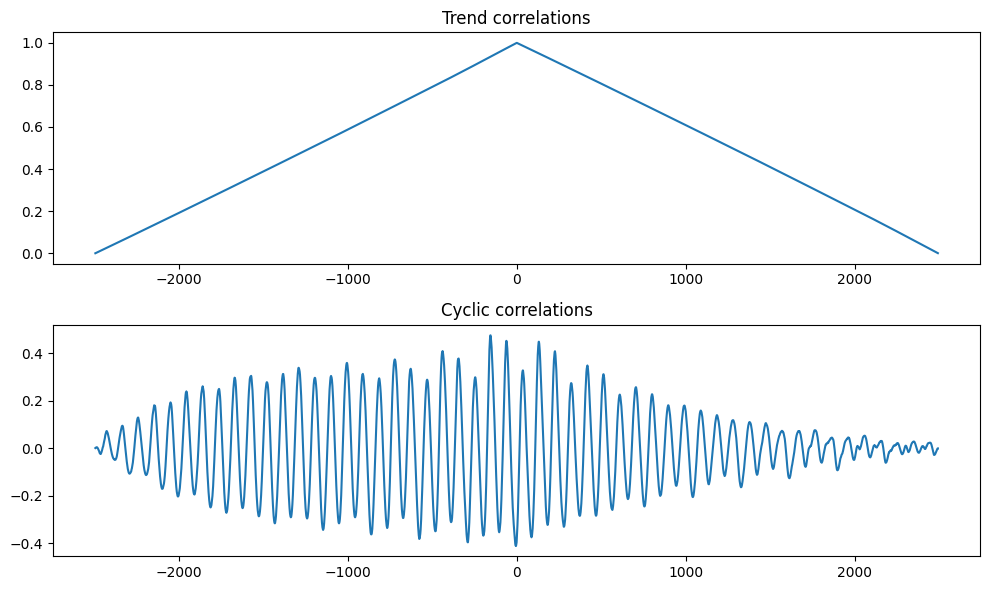

In [160]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))

corr_t_1 = scipy.signal.correlate(result_mstllow.trend,result_mstl3.trend)
norm_factor_1 = np.sqrt(np.sum(result_mstllow.trend**2) * np.sum(result_mstl3.trend**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1


ax[0].plot(lags_1,corr_t_normalized_1[:-1])
ax[0].set_title('Trend correlations')

corr_t_1 = scipy.signal.correlate(result_mstllow.seasonal,result_mstl3.seasonal)
norm_factor_1 = np.sqrt(np.sum(result_mstllow.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1

ax[1].plot(lags_1,corr_t_normalized_1[:-1])
ax[1].set_title('Cyclic correlations')

plt.tight_layout()
plt.show()


## High dendrometer

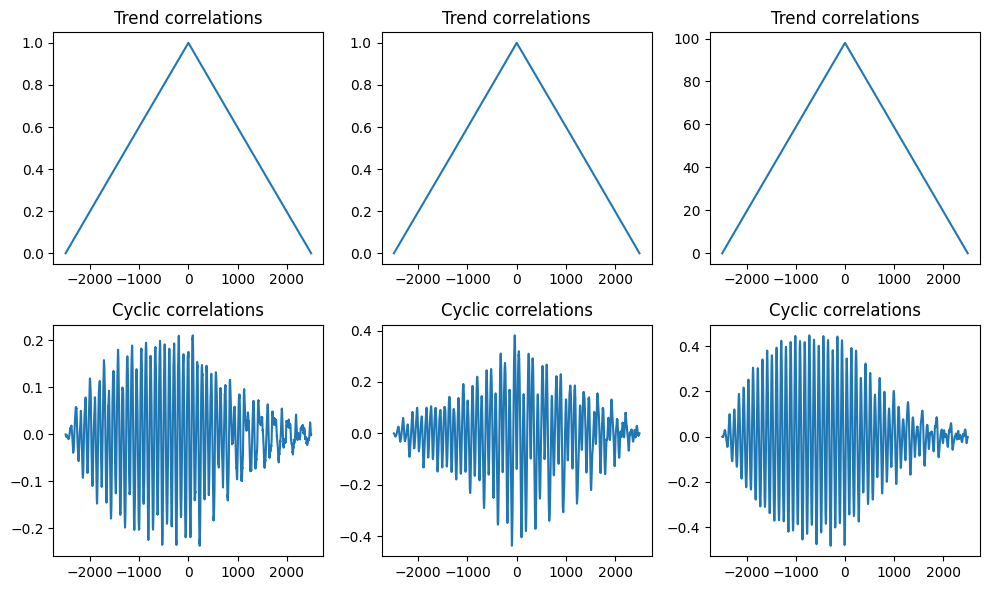

In [161]:
fig, ax = plt.subplots(2,3, figsize=(10, 6))

lags_1 = scipy.signal.correlation_lags(len(result_mstlhigh.trend), len(result_mstl1.trend), mode='full')
corr_t_1 = scipy.signal.correlate(result_mstlhigh.trend,result_mstl1.trend)
norm_factor_1 = np.sqrt(np.sum(result_mstlhigh.trend**2) * np.sum(result_mstl1.trend**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1
lags_2 = scipy.signal.correlation_lags(len(result_mstlhigh.trend), len(result_mstl2.trend), mode='full')
corr_t_2 = scipy.signal.correlate(result_mstlhigh.trend,result_mstl2.trend)
norm_factor_2 = np.sqrt(np.sum(result_mstlhigh.trend**2) * np.sum(result_mstl2.trend**2))
corr_t_normalized_2 = corr_t_2 / norm_factor_2
lags_3 = scipy.signal.correlation_lags(len(result_mstlhigh.trend), len(result_mstl3.trend), mode='full')
corr_t_3 = scipy.signal.correlate(result_mstlhigh.trend,result_mstl3.trend)
norm_factor_3 = np.sqrt(np.sum(result_mstlhigh.trend) * np.sum(result_mstl3.trend**2))
corr_t_normalized_3 = corr_t_3 / norm_factor_3


ax[0,0].plot(lags_1,corr_t_normalized_1)
ax[0,0].set_title('Trend correlations')
ax[0,1].plot(lags_2,corr_t_normalized_2)
ax[0,1].set_title('Trend correlations')
ax[0,2].plot(lags_3,corr_t_normalized_3)
ax[0,2].set_title('Trend correlations')

lags_1 = scipy.signal.correlation_lags(len(result_mstlhigh.seasonal), len(result_mstl1.seasonal), mode='full')
corr_t_1 = scipy.signal.correlate(result_mstlhigh.seasonal,result_mstl1.seasonal)
norm_factor_1 = np.sqrt(np.sum(result_mstlhigh.seasonal**2) * np.sum(result_mstl1.seasonal**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1
lags_2 = scipy.signal.correlation_lags(len(result_mstlhigh.seasonal), len(result_mstl2.seasonal), mode='full')
corr_t_2 = scipy.signal.correlate(result_mstlhigh.seasonal,result_mstl2.seasonal)
norm_factor_2 = np.sqrt(np.sum(result_mstlhigh.seasonal**2) * np.sum(result_mstl2.seasonal**2))
corr_t_normalized_2 = corr_t_2 / norm_factor_2
lags_3 = scipy.signal.correlation_lags(len(result_mstlhigh.seasonal), len(result_mstl3.seasonal), mode='full')
corr_t_3 = scipy.signal.correlate(result_mstlhigh.seasonal,result_mstl3.seasonal)
norm_factor_3 = np.sqrt(np.sum(result_mstlhigh.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_t_normalized_3 = corr_t_3 / norm_factor_3

ax[1,0].plot(lags_1,corr_t_normalized_1)
ax[1,0].set_title('Cyclic correlations')
ax[1,1].plot(lags_2,corr_t_normalized_2)
ax[1,1].set_title('Cyclic correlations')
ax[1,2].plot(lags_3,corr_t_normalized_3)
ax[1,2].set_title('Cyclic correlations')


plt.tight_layout()
plt.show()


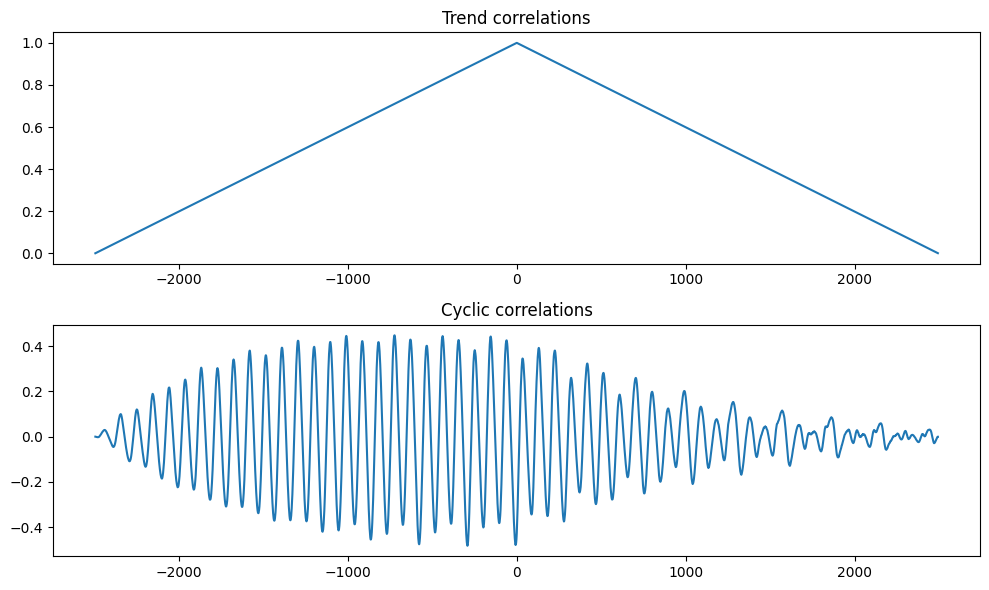

In [162]:
fig, ax = plt.subplots(2,1, figsize=(10, 6))

corr_t_1 = scipy.signal.correlate(result_mstlhigh.trend,result_mstl3.trend)
norm_factor_1 = np.sqrt(np.sum(result_mstlhigh.trend**2) * np.sum(result_mstl3.trend**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1


ax[0].plot(lags_1,corr_t_normalized_1[:-1])
ax[0].set_title('Trend correlations')

corr_t_1 = scipy.signal.correlate(result_mstlhigh.seasonal,result_mstl3.seasonal)
norm_factor_1 = np.sqrt(np.sum(result_mstlhigh.seasonal**2) * np.sum(result_mstl3.seasonal**2))
corr_t_normalized_1 = corr_t_1 / norm_factor_1

ax[1].plot(lags_1,corr_t_normalized_1[:-1])
ax[1].set_title('Cyclic correlations')

plt.tight_layout()
plt.show()
